In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai import * # import the FastAI v3 lib which includes pytorch
from fastai.vision import  * # import all of the computer vision related libs from vision 

In [2]:
from pathlib import Path
DATA_PATH_STR = 'drawings'
DATA_PATH_OBJ = Path(DATA_PATH_STR)

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
from fastai.vision.all import *
from PIL import ImageEnhance
class CustomTransform(RandTransform):
    def __init__(self, p=1.0, magnitude=0.3):
        super().__init__(p=p)
        self.magnitude = magnitude

    def apply(self, img:Image, magnitude:float, **kwargs):
        # Apply the transformation to the image
        img = img.rotate(magnitude * 360)
        img = img.resize((int(img.size[0]*random.uniform(0.5, 1.5)), int(img.size[1]*random.uniform(0.5, 1.5))))
        img = ImageEnhance.Color(img).enhance(random.uniform(0.5, 1.5))
        img = ImageEnhance.Brightness(img).enhance(random.uniform(0.5, 1.5))
        img = ImageEnhance.Contrast(img).enhance(random.uniform(0.5, 1.5))
        return img

    def get_params(self, **kwargs):
        # Return random parameters for the transformation
        return {'magnitude': self.magnitude * random.uniform(-1, 1)}

datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=partial(get_image_files, folders=['spiral', 'wave']),
    splitter=RandomSplitter(),
    get_y=parent_label,
    item_tfms=[Resize(460), CustomTransform()],
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
)

databunch = datablock.dataloaders(DATA_PATH_OBJ)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
print("Training dataset size:", len(databunch.train_ds))
print("Validation dataset size:", len(databunch.valid_ds))

Training dataset size: 164
Validation dataset size: 40


In [6]:
print(databunch.vocab)

['healthy', 'parkinson']


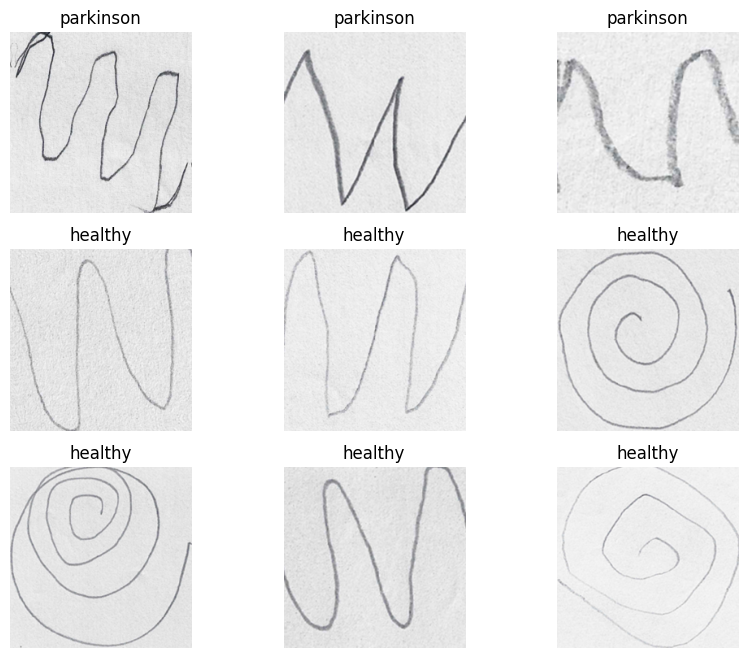

In [7]:
databunch.show_batch(figsize=(10,8))

In [8]:
learn = vision_learner(databunch, models.resnet34, metrics=accuracy, model_dir='/tmp/models')

/home/u187881/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/u187881/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
# lets start training via one cycle 
learn.fit_one_cycle(1)
# should happen quickly since the dataset is relatively small

epoch,train_loss,valid_loss,accuracy,time
0,0.548016,0.539088,0.800000,00:08


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2dbb006fe06d'
Traceback (mos

In [11]:
interp = ClassificationInterpretation.from_learner(learn)

Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2dbf006fe070'


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d8b006fe071'


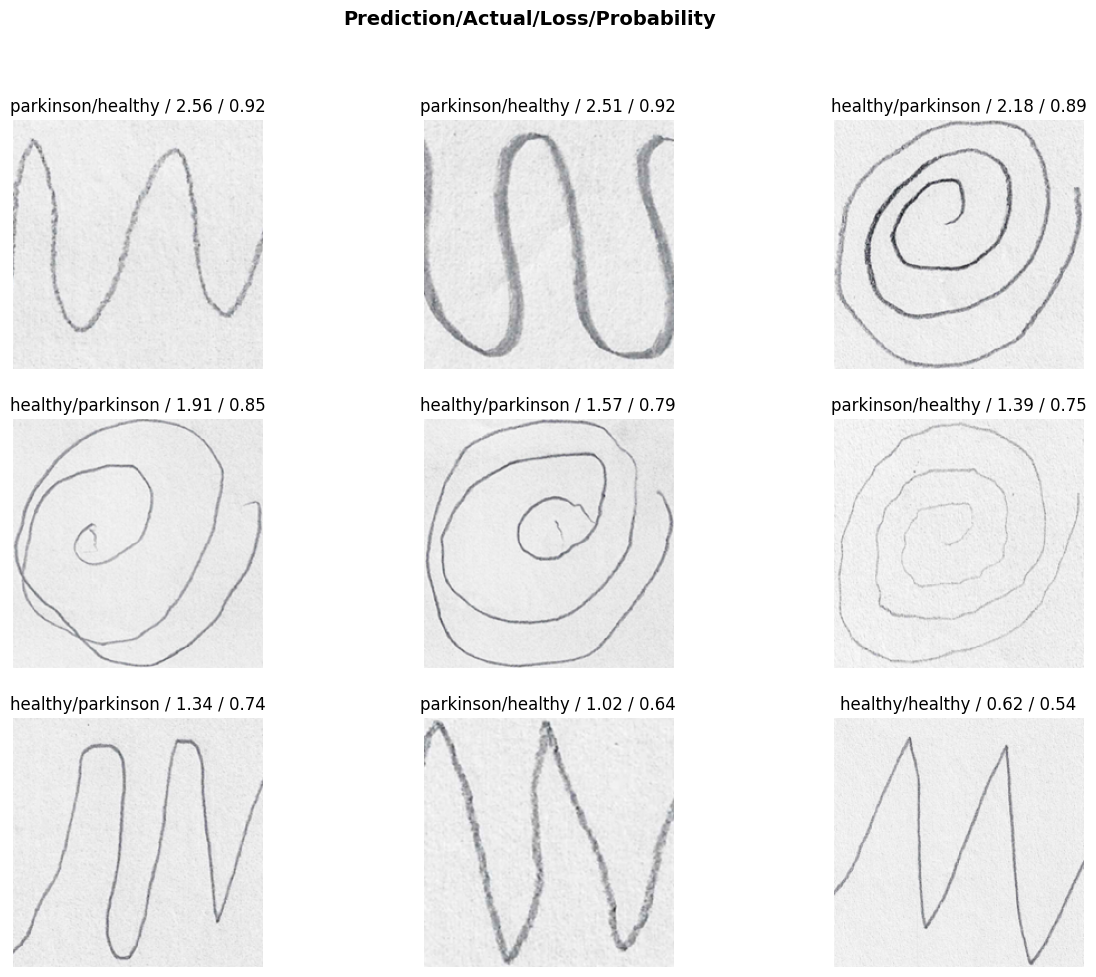

In [12]:
# show me what the model was most confident in yet, was incorrect.
losses,idxs = interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))

Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d8c006fe073'


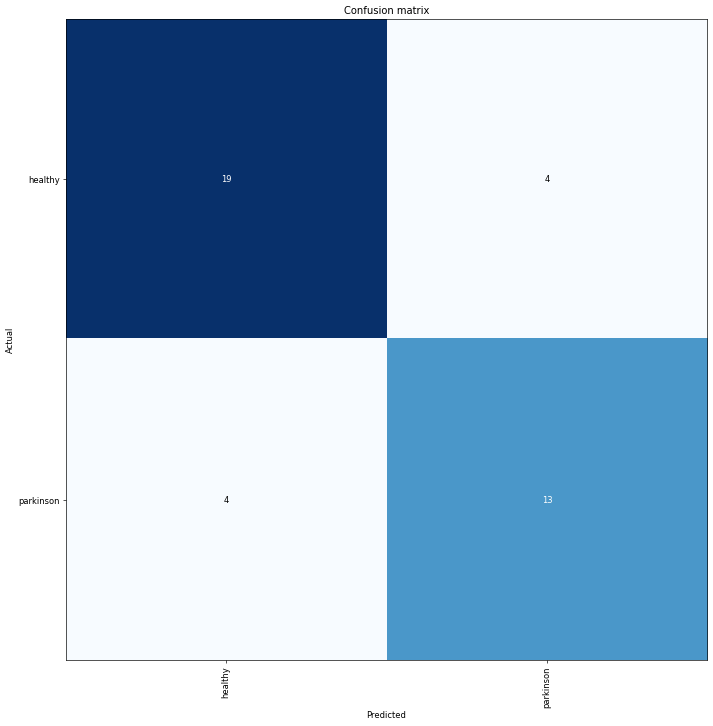

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [14]:
# lets unfreeze the remainder of the model to see if our model can do better 
learn.unfreeze()

In [17]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.754381,0.638309,0.825000,00:10
1,0.627716,1.659197,0.675000,00:10
2,0.641695,1.266574,0.725000,00:10


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d9d006fe080'
Traceback (mos

In [18]:
learn.save('stage-1-75')

Path('/tmp/models/stage-1-75.pth')

Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2da9006fe089'
Traceback (mos

SuggestedLRs(valley=0.0002754228771664202)

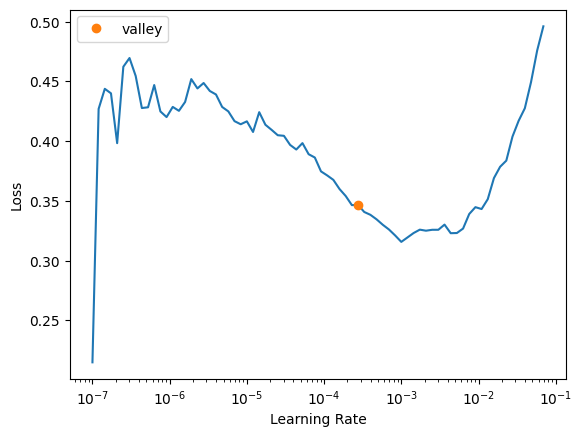

In [19]:
# lets try to find the learning rate to improve the model accuracy
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, lr_max=slice(1e-3, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.315793,0.986835,0.825000,00:10
1,0.221677,0.993535,0.825000,00:10
2,0.268840,0.979837,0.825000,00:10
3,0.248875,0.975168,0.825000,00:10
4,0.259192,0.976101,0.825000,00:11
5,0.270076,0.977068,0.825000,00:10
6,0.273013,0.988781,0.825000,00:10


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c985c006fe116'
Traceback (mos

In [19]:
learn.fit_one_cycle(10, lr_max=slice(1e-5, 1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.288148,0.396727,0.875000,00:10
1,0.340698,0.388035,0.875000,00:10
2,0.310375,0.369245,0.925000,00:10
3,0.312593,0.362815,0.925000,00:10
4,0.310243,0.353996,0.925000,00:10
5,0.308410,0.358683,0.950000,00:10
6,0.319965,0.378047,0.900000,00:10
7,0.315959,0.386740,0.875000,00:10
8,0.307029,0.393572,0.875000,00:10
9,0.303920,0.388357,0.875000,00:10


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d19006fe035'
Traceback (mos

In [20]:
learn.save('stage-2-86')

Path('/tmp/models/stage-2-86.pth')

Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d42006fe053'


Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d44006fe054'


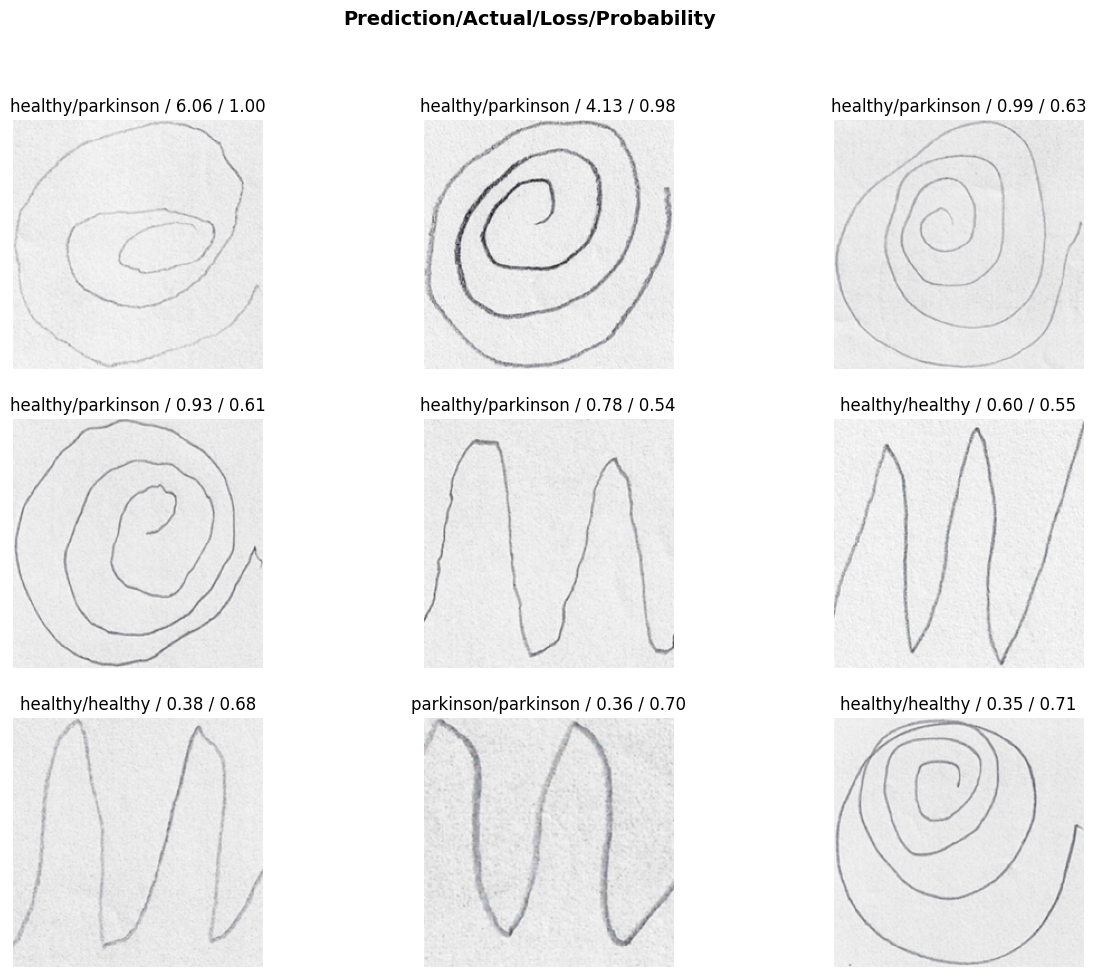

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11))

In [22]:
interp.most_confused()

Traceback (most recent call last):
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/multiprocessing/util.py", line 133, in _remove_temp_dir
    rmtree(tempdir)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 734, in rmtree
    _rmtree_safe_fd(fd, path, onerror)
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 690, in _rmtree_safe_fd
    onerror(os.unlink, fullname, sys.exc_info())
  File "/opt/intel/inteloneapi/intelpython/latest/lib/python3.9/shutil.py", line 688, in _rmtree_safe_fd
    os.unlink(entry.name, dir_fd=topfd)
OSError: [Errno 16] Device or resource busy: '.nfs00000000915c2d46006fe055'


[('parkinson', 'healthy', 5)]